# Ejercicion de programación - Regresión Logistica

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd

# Librerias para graficar
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Modulo de optimización de scipy
#from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## 1 Regresion Logistica

En esta parte del ejercicio, creará un modelo de regresión logística para predecir si un estudiante será admitido en una universidad. Suponga que es el administrador de un departamento universitario y desea determinar las posibilidades de admisión de cada solicitante en función de sus resultados en dos exámenes. Tiene datos históricos de solicitantes anteriores que puede usar como un conjunto de capacitación para la regresión logística. Para cada ejemplo de capacitación, se tiene las calificaciones del solicitante en dos exámenes y la decisión de admisión. Su tarea es crear un modelo de clasificación que calcule la probabilidad de admisión de un solicitante en función de los puntajes de esos dos exámenes.

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [4]:
# Cargar datos
# Cargar datos desde el archivo CSV
data = pd.read_csv('/content/drive/MyDrive/SIS420 IA 1/datasets/Propios/competition_format/x_train.csv', delimiter=',')

# Convertir la columna 'gender' de M/F a 1/0
data['gender'] = data['gender'].map({'M': 1, 'F': 0})

# Convertir las columnas 'oral' y 'tartar' de Y/N a 1/0
data['oral'] = data['oral'].map({'Y': 1, 'N': 0})
data['tartar'] = data['tartar'].map({'Y': 1, 'N': 0})
#display(data)
#data = data.drop(data.columns[0], axis=1)
data = data.drop(['ID','oral'], axis=1)

display(data)
X = data.iloc[:,:27]
y = pd.read_csv('/content/drive/MyDrive/SIS420 IA 1/datasets/Propios/competition_format/x_train.csv', delimiter=',')#cargamos la columna Y
y = data.iloc[:,0]
print(X.shape[0])
print(y.shape[0])
print(X.describe())

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0.0,1
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0.0,1
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0.0,0
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0.0,1
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,1,50,170,65,88.0,1.2,1.2,1.0,1.0,148.0,...,40.0,108.0,15.2,1.0,1.0,45.0,49.0,51.0,0.0,1
44549,1,35,175,70,84.0,0.6,0.7,1.0,1.0,105.0,...,57.0,118.0,15.2,1.0,0.9,20.0,14.0,16.0,0.0,1
44550,1,35,175,70,70.9,1.5,1.5,1.0,1.0,116.0,...,41.0,92.0,13.4,1.0,1.0,18.0,19.0,10.0,0.0,1
44551,1,50,165,90,106.8,0.8,0.5,1.0,1.0,122.0,...,47.0,104.0,14.5,1.0,0.9,30.0,49.0,40.0,0.0,1


44553
44553
             gender           age    height(cm)    weight(kg)     waist(cm)  \
count  44553.000000  44553.000000  44553.000000  44553.000000  44553.000000   
mean       0.636298     44.210603    164.657038     65.883442     82.077247   
std        0.481070     12.089077      9.198571     12.823676      9.278288   
min        0.000000     20.000000    130.000000     30.000000     51.000000   
25%        0.000000     40.000000    160.000000     55.000000     76.000000   
50%        1.000000     40.000000    165.000000     65.000000     82.000000   
75%        1.000000     55.000000    170.000000     75.000000     88.000000   
max        1.000000     85.000000    190.000000    135.000000    129.000000   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  \
count    44553.000000     44553.000000    44553.00000    44553.000000   
mean         1.011734         1.008134        1.02561        1.026036   
std          0.488131         0.488762        0.15797    

### 1.1 Visualizar los datos

Antes de comenzar a implementar cualquier algoritmo de aprendizaje, siempre es bueno visualizar los datos si es posible. Mostramos los datos en una gráfica bidimensional llamando a la función `plotData`. Se completará el código en `plotData` para que muestre una figura donde los ejes son los dos puntajes de los dos examenes, los ejemplos positivos y negativos se muestran con diferentes marcadores.

In [5]:
def plotData(X, y):
    """
    Grafica los puntos de datos X y y en una nueva figura.
    Los puntos positivos se grafican con '*' y los negativos con 'o'.
    """
    # Crear una nueva figura
    plt.figure(figsize=(10, 6))

    # Encontrar índices de ejemplos positivos y negativos
    pos = y == 1
    neg = y == 0

    # Graficar ejemplos
    plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10, label='Fumador')
    plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1, label='No fumador')

    # Añadir etiquetas y leyenda
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend()
    plt.title('Gráfica de Datos de Clasificación')

    # Mostrar la gráfica
    plt.show()


Se llama a la función implementada para mostrar los datos cargados:

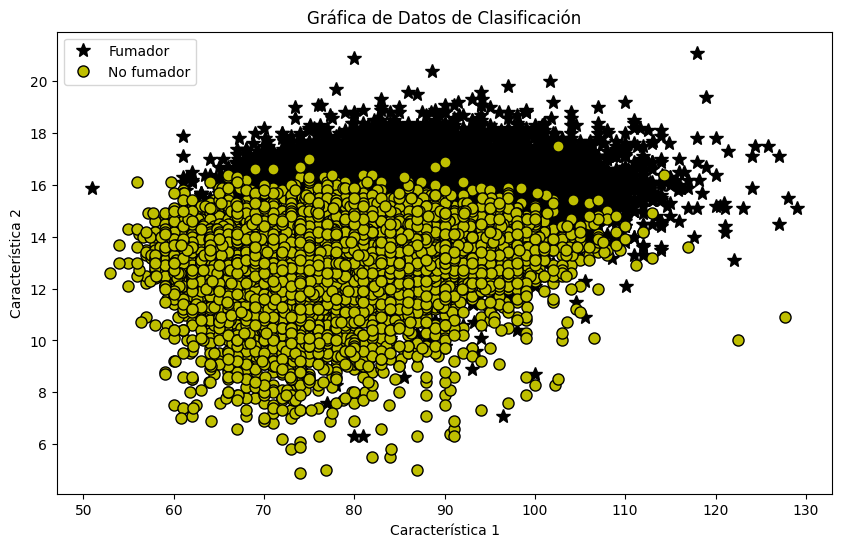

In [6]:
# Supongamos que X y y están definidos y contienen las características y etiquetas

# Selecciona dos características para la visualización (si es necesario)
X_plot = data.iloc[:, [4, 16]].values

# Graficar los datos
plotData(X_plot, y)


In [7]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [8]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#display(X_norm)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
print(X_norm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44553 entries, 0 to 44552
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               44553 non-null  float64
 1   age                  44553 non-null  float64
 2   height(cm)           44553 non-null  float64
 3   weight(kg)           44553 non-null  float64
 4   waist(cm)            44553 non-null  float64
 5   eyesight(left)       44553 non-null  float64
 6   eyesight(right)      44553 non-null  float64
 7   hearing(left)        44553 non-null  float64
 8   hearing(right)       44553 non-null  float64
 9   systolic             44553 non-null  float64
 10  relaxation           44553 non-null  float64
 11  fasting blood sugar  44553 non-null  float64
 12  Cholesterol          44553 non-null  float64
 13  triglyceride         44553 non-null  float64
 14  HDL                  44553 non-null  float64
 15  LDL                  44553 non-null 

In [9]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [10]:
# Prueba la implementacion de la funcion sigmoid
#z = [0, 0.5, 1]
g = sigmoid(X_norm)

g=pd.DataFrame(g)

print(g.describe())

                 0             1             2             3             4   \
count  44553.000000  44553.000000  44553.000000  44553.000000  44553.000000   
mean       0.509509      0.496933      0.501934      0.494542      0.497735   
std        0.226161      0.209068      0.213464      0.207672      0.207727   
min        0.210371      0.118919      0.022583      0.057419      0.033912   
25%        0.210371      0.413794      0.376065      0.299704      0.341863   
50%        0.680492      0.413794      0.509320      0.482784      0.497919   
75%        0.680492      0.709406      0.641264      0.670605      0.654381   
max        0.680492      0.966885      0.940202      0.995458      0.993678   

                 5             6             7             8             9   \
count  44553.000000  44553.000000  44553.000000  44553.000000  44553.000000   
mean       0.494322      0.494277      0.473346      0.473238      0.496599   
std        0.153122      0.152146      0.085044    

<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [11]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = g.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), g], axis=1)
X =pd.DataFrame(X)
display(X)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.210371,0.413794,0.259253,0.387270,0.479069,0.595245,0.495839,0.459558,0.459216,...,0.743062,0.566549,0.249638,0.446482,0.305103,0.394047,0.436691,0.435957,0.372607,0.709716
1,1.0,0.210371,0.413794,0.376065,0.387270,0.471006,0.393226,0.302579,0.459558,0.459216,...,0.262436,0.572537,0.226470,0.446482,0.220043,0.445032,0.436691,0.392928,0.372607,0.709716
2,1.0,0.680492,0.709406,0.641264,0.387270,0.444261,0.393226,0.395119,0.459558,0.459216,...,0.461408,0.706505,0.679758,0.446482,0.623351,0.432133,0.413606,0.411889,0.372607,0.246279
3,1.0,0.680492,0.413794,0.509320,0.579572,0.654381,0.731115,0.732308,0.459558,0.459216,...,0.303523,0.937645,0.512428,0.446482,0.623351,0.406624,0.491461,0.392928,0.372607,0.709716
4,1.0,0.210371,0.413794,0.259253,0.387270,0.604151,0.493990,0.495839,0.459558,0.459216,...,0.578948,0.451072,0.204865,0.446482,0.220043,0.369325,0.398418,0.411889,0.372607,0.246279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,1.0,0.680492,0.617488,0.641264,0.482784,0.654381,0.595245,0.596899,0.459558,0.459216,...,0.237122,0.457127,0.591275,0.446482,0.623351,0.727951,0.666000,0.553685,0.372607,0.709716
44549,1.0,0.680492,0.318233,0.754808,0.579572,0.551624,0.300798,0.347410,0.459558,0.459216,...,0.495127,0.518083,0.591275,0.446482,0.515368,0.419325,0.398418,0.383563,0.372607,0.709716
44550,1.0,0.680492,0.318233,0.754808,0.579572,0.230644,0.731115,0.732308,0.459558,0.459216,...,0.249565,0.362911,0.314099,0.446482,0.623351,0.394047,0.436691,0.356006,0.372607,0.709716
44551,1.0,0.680492,0.617488,0.509320,0.867686,0.934906,0.393226,0.261218,0.459558,0.459216,...,0.332834,0.433000,0.480488,0.446482,0.515368,0.549431,0.666000,0.499677,0.372607,0.709716


In [12]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [13]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

Costo final: 0.0047
theta calculado por el descenso por el gradiente: 0     -6.019106
1     17.737860
2     -1.487419
3      4.532479
4      0.679828
5      0.139325
6     -1.079728
7     -1.059808
8     -1.203381
9     -1.184330
10     0.347527
11    -0.340475
12    -0.395154
13    -0.545292
14    -0.625702
15    -2.573028
16    -1.669205
17     4.736042
18    -1.711157
19     3.098110
20    -0.602588
21    -0.721475
22     1.105900
23    -0.509787
24    -0.700048
Name: gender, dtype: float64


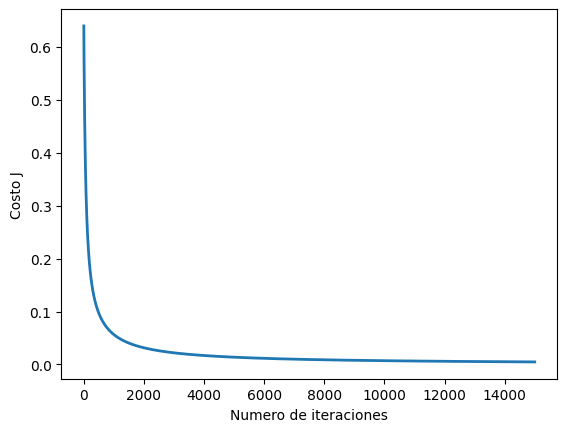

In [14]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.3
num_iters = 15000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
cost = J_history[:-1] #saca el valor del costo
print('Costo final: {:.4f}'.format(cost[-1]))
# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


In [15]:
def predict(theta, X_test):
    # Calcula las probabilidades utilizando la función sigmoide
    probabilities = sigmoid(X_test.dot(theta))
    # Convierte las probabilidades a predicciones binarias (0 o 1) utilizando un umbral de 0.5
    #p = (probabilities >= 0.5).astype(int)
    p = np.round(sigmoid(X_test.dot(theta.T)))
    return p


In [16]:

X_test = pd.read_csv(('/content/drive/MyDrive/SIS420 IA 1/datasets/Propios/competition_format/x_test.csv'),delimiter=',')
y_test = pd.read_csv(('/content/drive/MyDrive/SIS420 IA 1/datasets/Propios/competition_format/y_test.csv'),delimiter=',')
# Convertir la columna 'gender' de M/F a 1/0
X_test['gender'] = X_test['gender'].map({'M': 1, 'F': 0})

# Convertir las columnas 'oral' y 'tartar' de Y/N a 1/0
X_test['oral'] = X_test['oral'].map({'Y': 1, 'N': 0})
X_test['tartar'] = X_test['tartar'].map({'Y': 1, 'N': 0})
#X_test = X_test.drop(X_test.columns[0], axis=1)
X_test = X_test.drop(['ID','oral'], axis=1)
X_test = X_test.iloc[:,:]
y_test = y_test.iloc[:,1]
m_test = X_test.shape[0]

X_test_norm = (X_test - mu) / sigma
X = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
y_predicted = predict(theta, X)

print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_predicted == y_test) * 100))

# Imprime un resumen de las primeras 10 predicciones
num_to_print = min(25, len(y_predicted))  # En caso de que haya menos de 10 predicciones

print("Resumen de las primeras predicciones:")
for i in range(num_to_print):
    print(f'Persona {i+1}: Predicción = {y_predicted[i]:.2f}')
print(y_predicted.shape[0])

Precisión de entrenamiento: 70.86 %
Resumen de las primeras predicciones:
Persona 1: Predicción = 1.00
Persona 2: Predicción = 1.00
Persona 3: Predicción = 1.00
Persona 4: Predicción = 1.00
Persona 5: Predicción = 1.00
Persona 6: Predicción = 1.00
Persona 7: Predicción = 1.00
Persona 8: Predicción = 0.00
Persona 9: Predicción = 1.00
Persona 10: Predicción = 0.00
Persona 11: Predicción = 1.00
Persona 12: Predicción = 1.00
Persona 13: Predicción = 0.00
Persona 14: Predicción = 1.00
Persona 15: Predicción = 1.00
Persona 16: Predicción = 0.00
Persona 17: Predicción = 0.00
Persona 18: Predicción = 0.00
Persona 19: Predicción = 1.00
Persona 20: Predicción = 1.00
Persona 21: Predicción = 1.00
Persona 22: Predicción = 1.00
Persona 23: Predicción = 0.00
Persona 24: Predicción = 0.00
Persona 25: Predicción = 1.00
11139


In [17]:
def predict(theta, X_test):
    #devuelve el tamaño del primer eje de la matriz
    m = X_test.shape[0] # Numero de ejemplo de entrenamiento
    #Esta línea inicializa un vector p de tamaño m con ceros
    p = np.zeros(m)
    #Esta línea realiza las predicciones utilizando la función sigmoide y el producto punto entre X_test y theta.T
    p = np.round(sigmoid(X_test.dot(theta.T)))
    return p

In [18]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [19]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y_test)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[ 0.13165455 -0.25251709  0.07908994 -0.19721555 -0.15325095 -0.11446123
 -0.03145136 -0.03160737  0.01048129  0.01117232 -0.03579786 -0.05590303
 -0.04971845  0.00867216 -0.12394863  0.08950138  0.02100269 -0.1993841
 -0.00368348 -0.10961758 -0.03043315 -0.04769196 -0.11398627 -0.04756711
 -0.04012167]
Gradiente en theta inicial (zeros):
	[0.1317, -0.2525, 0.0791]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [20]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

cost, grad = costFunction(theta, X, y_test)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

Costo en theta prueba: nan
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[0.242, 0.212, -0.088]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


<ipython-input-18-8186d7400ad7>:9: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


#### 1.2.3 Parámetros de aprendizaje usando `scipy.optimize`

En el codigo anterior se encontró los parámetros óptimos de un modelo de regresión lineal al implementar el descenso de gradiente. Se implemento una función de costo y se calculó su gradiente, utilizando el algoritmo del descenso por el gradiente.

En lugar de realizar los pasos del descenso por el gradiente, se utilizará el [módulo `scipy.optimize`] (https://docs.scipy.org/doc/scipy/reference/optimize.html). SciPy es una biblioteca de computación numérica para `python`. Proporciona un módulo de optimización para la búsqueda y minimización de raíces. A partir de `scipy 1.0`, la función` scipy.optimize.minimize` es el método a utilizar para problemas de optimización (tanto restringidos como no restringidos).

For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$.
Concretely, you are going to use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to `optimize.minimize` the following inputs:

Para la regresión logística, se desea optimizar la función de costo $J(\theta)$ con los parámetros $\theta$.
Concretamente, se va a utilizar `optimize.minimize` para encontrar los mejores parámetros $\theta$ para la función de costo de regresión logística, dado un dataset fijo (de valores X e y). Se pasara a `optimize.minimize` las siguientes entradas:

- `costFunction`: Una función de costo que, cuando se le da el dataset de entrenamiento y un $\theta$ particular, calcula el costo de regresión logística y el gradiente con respecto a $\theta$ para el dataset(X, y). Es importante tener en cuenta que solo se pasa el nombre de la función sin el paréntesis. Esto indica que solo proporcionamos una referencia a esta función y no evaluamos el resultado de esta función.
- `initial_theta`: Los valores iniciales de los parametros que se tratan de optimizar.
- `(X, y)`: Estos son argumentos adicionales a la funcion de costo.
- `jac`: Indicación si la función de costo devuelve el jacobiano (gradiente) junto con el valor de costo. (True)
- `method`: Método / algoritmo de optimización a utilizar
- `options`: Opciones adicionales que pueden ser específicas del método de optimización específico. Solo se indica al algoritmo el número máximo de iteraciones antes de que termine.

Si se ha completado la `costFunction` correctamente,`optimize.minimize` convergerá en los parámetros de optimización correctos y devolverá los valores finales del costo y $\theta$ en un objeto de clase.

Al usar `optimize.minimize`, no se tuvo que escribir ningún bucle ni establecer una tasa de aprendizaje como se hizo para el descenso de gradientes. Todo esto se hace mediante `optimize.minimize`: solo se necesita proporcionar una función que calcule el costo y el gradiente.

A continuación, se tiene el código para llamar a `optimize.minimize` con los argumentos correctos.

In [21]:
from scipy import optimize #importamos la libreria requerida

# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,initial_theta,(X, y_test),jac=True,method='TNC',options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Costo con un valor de theta encontrado por optimize.minimize: 0.465
Costo esperado (aproximado): 0.203

theta:
	[-1.038, 1.471, 0.022]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


<ipython-input-21-40f3adbae224>:9: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,initial_theta,(X, y_test),jac=True,method='TNC',options=options)


Una vez que se completa `optimize.minimize`, se usa el valor final de $\theta$ para visualizar el límite de decisión en los datos de entrenamiento.

Para hacerlo, se implementa la función `plotDecisionBoundary` para trazar el límite de decisión sobre los datos de entrenamiento.

<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

Después de aprender los parámetros, se puede usar el modelo para predecir si un estudiante en particular será admitido. Para un estudiante con una puntuación en el Examen 1 de 45 y una puntuación en el Examen 2 de 85, debe esperar ver una probabilidad de admisión de 0,776. Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento.

In [22]:
def predict(theta, X):

    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [36]:
#  Predice la probabilidad de que una persona fuma o no
prob = sigmoid(np.dot(X,theta)) # Changed the order of the arguments to np.dot
# Access the first element of the prob array
print('Para datos de X de una persona, se predice una probabilidad deque fuma de: {:.3f}%'.format(prob[0]))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_test) * 100)) # Changed prob to p
print('Precisión esperada (aproximadamente): 89.00 %')

Para datos de X de una persona, se predice una probabilidad deque fuma de: 0.399%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 75.04 %
Precisión esperada (aproximadamente): 89.00 %
